In [1]:
import sympy as sp
import numpy as np

In [2]:
sp.init_printing()

In [3]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

$$\frac{d^2\psi(x)}{dx^2} = -k^2\psi(x)$$

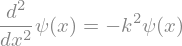

In [4]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

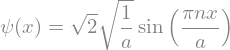

In [5]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol = sol.subs(k, n * sp.pi / a)
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

$$<\omega>=\int \Psi^{*} \hat{\omega} \Psi\ dx$$

$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

## **Zadanie**
Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.

## **Rozwiązanie**
**Położenie**

$$<x>=?$$
$$<x^2>=?$$
$$\sigma_X=?$$
$$\sigma_X^2=?$$

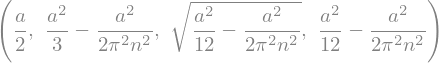

In [6]:
X = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
Xsquared = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
sigmaXsquared = Xsquared-X**2
sigmaX = sp.sqrt(sigmaXsquared)

X, Xsquared, sigmaX, sigmaXsquared

**Pęd**

$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P=?$$
$$\sigma_P^2=?$$

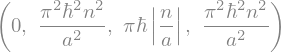

In [7]:
P = sp.integrate(sol.rhs*-h*sp.I*sol.rhs.diff(x),(x,0,a)).simplify()
Psquared = sp.integrate(sol.rhs * (sol.rhs).diff(x,x)*-h**2, (x, 0, a)).simplify()
sigmaPsquared = Psquared-P**2
sigmaP = sp.sqrt(sigmaPsquared).simplify()

P, Psquared, sigmaP, sigmaPsquared

### **Sprawdzenie nierówności**

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

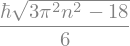

In [8]:
check = sigmaP*sigmaX
check.simplify()

**Dla n=1:**

In [9]:
res1 = h*np.sqrt(3*np.pi**2-18)/6
res2 = h/2

res1, res2.evalf(), res1 > res2.evalf()

#### **Zasada nieoznaczoności jest spełniona dla najmniejszego możliwego n, zatem jest zawsze spełniona**